In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset_patientinfo = pd.read_csv('PatientInfo.csv')
dataset_seoulfloating = pd.read_csv('SeoulFloating.csv')

In [3]:
dataset_patientinfo.tail()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated
5164,7000000019,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


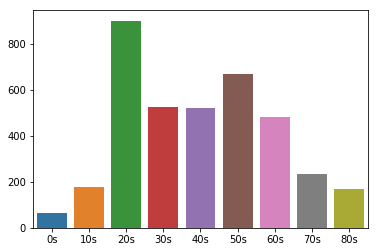

In [4]:
# CHILDREN ARE LESS LIKELY TO CATCH THE INFECTION, WORKING AGE IS HIGHLY VULNERABLE. (FROM JAN TO JUNE DATA)
sns.barplot(x=["0s","10s","20s","30s","40s","50s","60s","70s","80s"] , y = [66,178,899,523,518,667,482,232,170])

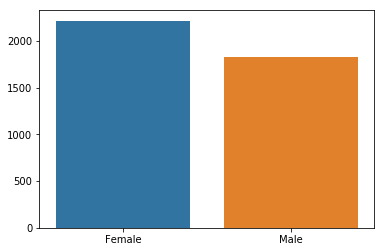

In [5]:
sns.barplot(x=["Female","Male"],y=[2218,1825]) #THIS SHOWS THAT FEMALES HAVE A HIGHER INFECTION RATE

In [6]:
dataset_patientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
patient_id            5165 non-null int64
sex                   4043 non-null object
age                   3785 non-null object
country               5165 non-null object
province              5165 non-null object
city                  5071 non-null object
infection_case        4246 non-null object
infected_by           1346 non-null object
contact_number        791 non-null object
symptom_onset_date    690 non-null object
confirmed_date        5162 non-null object
released_date         1587 non-null object
deceased_date         66 non-null object
state                 5165 non-null object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [7]:
infectionperc_by_area = [1610/4246 , 840/4246 , 703/4246 , 162/4246 , 128/4246]
for i in range(len(infectionperc_by_area)):
    infectionperc_by_area[i] = infectionperc_by_area[i]*100
infectionperc_by_area_label=['contact with patient','overseas inflow','etc','Itaewon Clubs','Richway']



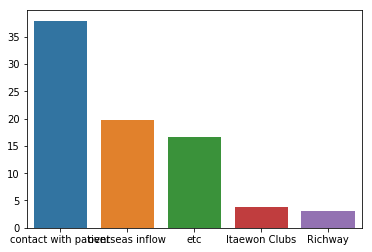

In [8]:
sns.barplot(x=infectionperc_by_area_label[:10],y=infectionperc_by_area[:10]) #TOP 5 SOURCES OF COVID-19 AND THEIR %

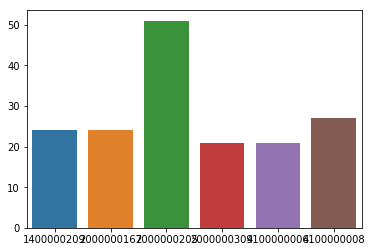

In [9]:
#SUPER SPREADERS
sns.barplot(x=["2000000205","4100000008","2000000167","1400000209","4100000006","2000000309"] , y=[51,27,24,24,21,21]) 

In [10]:
dataset_patientinfo['state'].value_counts()

released    2929
isolated    2158
deceased      78
Name: state, dtype: int64

In [11]:
dataset_patientinfo['sex'].value_counts()

female    2218
male      1825
Name: sex, dtype: int64

In [12]:
sorted_by_state = dataset_patientinfo.sort_values(by='state')   

In [13]:
sorted_by_state.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1513,1200001921,male,60s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-05,deceased
4106,6001000349,female,70s,Korea,Gyeongsangbuk-do,Gyeongsan-si,etc,NaN,NaN,NaN,2020-03-05,2020-05-08,2020-05-11,deceased
4042,6001000285,male,60s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,2020-03-03,NaN,2020-03-04,deceased
3980,6001000223,female,80s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,2020-03-02,2020-03-30,2020-04-08,deceased
108,1000000109,male,90s,Korea,Seoul,etc,contact with patient,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased


In [14]:
all_deceased = sorted_by_state.iloc[:78,[1,2]]

In [15]:
all_deceased['sex'].value_counts()

male      47
female    28
Name: sex, dtype: int64

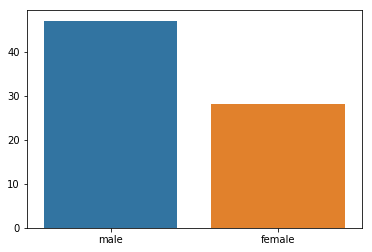

In [16]:
# CHANCES OF A MAN DYING OF THE DISEASE IS ALMOST 2X HIGHER
sns.barplot(x=['male','female'],y=[47,28])

In [17]:
all_deceased['age'].value_counts()

80s    25
70s    21
60s    12
90s     7
50s     7
40s     2
30s     1
Name: age, dtype: int64

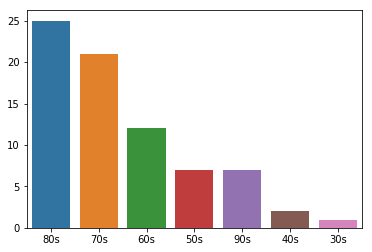

In [18]:
#DEATH RATE IS LINEARLY CORRELATED WITH AGE
sns.barplot(x=['80s','70s','60s','50s','90s','40s','30s'],y=[25,21,12,7,7,2,1])

In [19]:
def time_format(x):
    x = str(x)
    if "-" in x:
        z = x.split("-")
        return z

In [20]:
dataset_patientinfo['confirmed_date'] = dataset_patientinfo['confirmed_date'].apply(lambda x:time_format(x))
dataset_patientinfo['released_date'] = dataset_patientinfo['released_date'].apply(lambda x:time_format(x))

In [21]:
dataset_patientinfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,"[2020, 01, 23]","[2020, 02, 05]",NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,"[2020, 01, 30]","[2020, 03, 02]",NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,"[2020, 01, 30]","[2020, 02, 19]",NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,"[2020, 01, 30]","[2020, 02, 15]",NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,"[2020, 01, 31]","[2020, 02, 24]",NaN,released


In [22]:
from datetime import date

In [23]:
confirm_cure = dataset_patientinfo.iloc[:,[10,11]].values

In [24]:
duration = []
for i in confirm_cure:
    if i[0] and i[1]:
        start = date(int(i[0][0]),int(i[0][1]),int(i[0][2]))
        end = date(int(i[1][0]),int(i[1][1]),int(i[1][2]))
        duration.append((end-start).days)

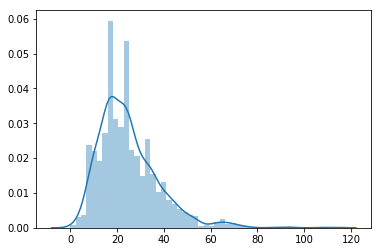

In [25]:
# FOR MOST PEOPLE, RECOVERY TIME IS 20-25 DAYS.
sns.distplot(duration,bins=50)

In [26]:
import statistics
statistics.mean(duration)

#average recovery time is 24.71 days.

24.73156899810964

In [27]:
dataset_seoulfloating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [28]:
dataset_tg = pd.read_csv('TimeGender.csv')

In [29]:
dataset_tg.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [30]:
dataset_tg.shape

(242, 5)

In [31]:
import random
days_list5 = []
while len(days_list5)<20:
    xx = random.randint(0,242)
    if xx%2==0:
        days_list5.append(xx)           

In [32]:
male_vs_female=[]
for t in days_list5:
    male_vs_female.append([dataset_tg['confirmed'][t],dataset_tg['confirmed'][t+1]])
male_vs_female
m,f = [],[]
for t in male_vs_female:
    m.append(t[0])
    f.append(t[1])
print(m)
print(f)

[4229, 4872, 5270, 4185, 4163, 3946, 3430, 4256, 5061, 5061, 4680, 4643, 4549, 3799, 4297, 4215, 4333, 5450, 4829, 3200]
[6283, 6757, 7151, 6238, 6221, 5941, 5467, 6308, 6942, 6942, 6585, 6547, 6501, 5784, 6364, 6265, 6395, 7265, 6712, 5120]


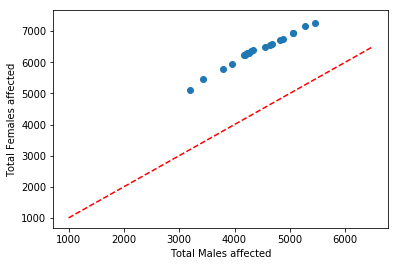

In [33]:
#The dashed line shows the line x=y(when the number of males and females affected are equal) but surprisingly, 20 random
#dates were chosen and surprisingly on every date, the number of accumulated infections among females were higher.
bb = [1000,6500]
aa = [1000,6500]
plt.xlabel('Total Males affected')
plt.ylabel('Total Females affected')
plt.plot(aa,bb, 'r--')
plt.scatter(m,f)

In [37]:
days_list5 = []
while len(days_list5)<20:
    xx = random.randint(0,242)
    if xx%2==0:
        days_list5.append(xx)
male_vs_female=[]
for t in days_list5:
    male_vs_female.append([dataset_tg['deceased'][t],dataset_tg['deceased'][t+1]])
male_vs_female
m,f = [],[]
for t in male_vs_female:
    m.append(t[0])
    f.append(t[1])
print(m)
print(f)        

[137, 133, 127, 35, 140, 150, 147, 145, 58, 116, 92, 133, 151, 133, 147, 29, 122, 80, 126, 140]
[126, 123, 116, 25, 126, 130, 129, 128, 53, 106, 82, 123, 131, 123, 130, 20, 107, 78, 112, 126]


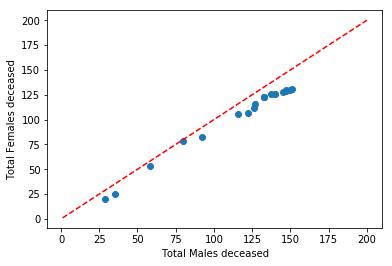

In [38]:
# In contrast to number of infections, the number of accumulated deceased graph shifts closer to men's side.
#IMPORTANT INSIGHT: number of infections is much higher in females but death rate in females is lower.
bb = [1,200]
aa = [1,200]
plt.xlabel('Total Males deceased')
plt.ylabel('Total Females deceased')
plt.plot(aa,bb, 'r--')
plt.scatter(m,f)

In [39]:
dataset_time = pd.read_csv('Time.csv')

In [42]:
dataset_time.head() # Data collected over 163 days starting from 20th January 2020
# dataset_time.shape

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [416]:
day_by_day_test = [dataset_time['test'][0]]
day_by_day_confirmed = [dataset_time['confirmed'][0]]
day_by_day_deceased = [dataset_time['deceased'][0]]
all_test,all_confirmed,all_deceased = [dataset_time['test'][0]],[dataset_time['confirmed'][0]],[dataset_time['deceased'][0]]
for i in range(1,163):
    day_by_day_test.append(dataset_time['test'][i]-dataset_time['test'][i-1])
    day_by_day_confirmed.append(dataset_time['confirmed'][i]-dataset_time['confirmed'][i-1])
    day_by_day_deceased.append(dataset_time['deceased'][i]-dataset_time['deceased'][i-1])
    all_test.append(dataset_time['test'][i])
    all_confirmed.append(dataset_time['confirmed'][i])
    all_deceased.append(dataset_time['deceased'][i])

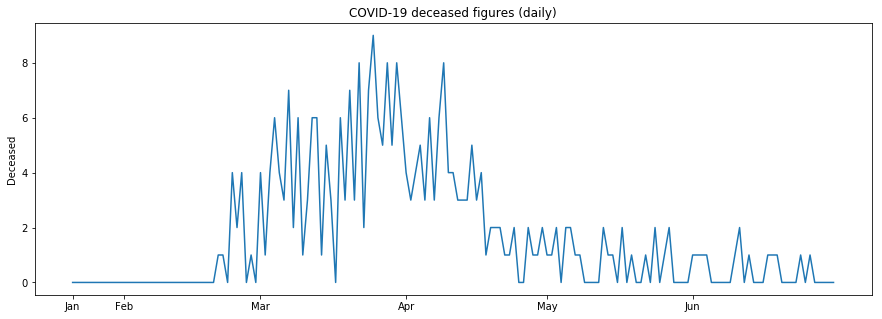

In [115]:
# sns.lineplot(x=range(163),y=day_by_day_deceased)
plt.figure(figsize=(15,5))
plt.plot(day_by_day_deceased)
plt.title('COVID-19 deceased figures (daily)')
plt.ylabel('Deceased')
plt.xticks(ticks=[0,11,40,71,101,132] ,labels = ['Jan','Feb','Mar','Apr','May','Jun'])
plt.show()

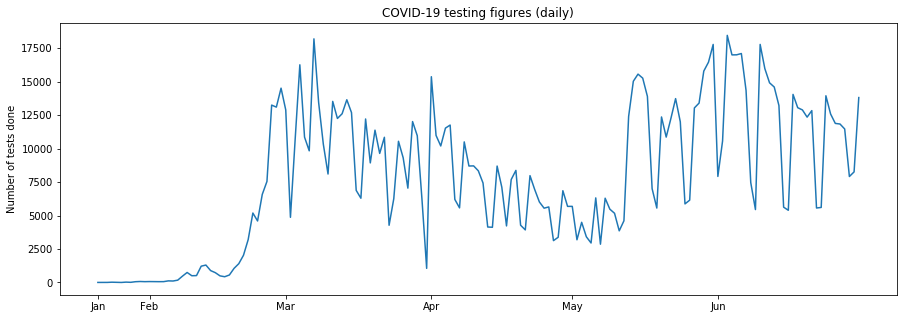

In [116]:
# sns.lineplot(x=range(163),y=day_by_day_test)
plt.figure(figsize=(15,5))
plt.plot(day_by_day_test)
plt.title('COVID-19 testing figures (daily)')
plt.ylabel('Number of tests done')
plt.xticks(ticks=[0,11,40,71,101,132] ,labels = ['Jan','Feb','Mar','Apr','May','Jun'])
plt.show()

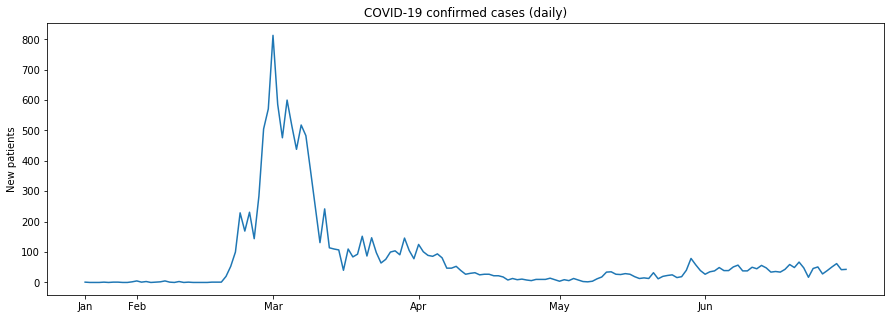

In [118]:
# sns.lineplot(x=range(163),y=day_by_day_confirmed)
plt.figure(figsize=(15,5))
plt.plot(day_by_day_confirmed)
plt.title('COVID-19 confirmed cases (daily)')
plt.ylabel('New patients')
plt.xticks(ticks=[0,11,40,71,101,132] ,labels = ['Jan','Feb','Mar','Apr','May','Jun'])
plt.show()

In [63]:
dataset_search = pd.read_csv('SearchTrend.csv')

In [64]:
dataset_search.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [65]:
dataset_search.shape

(1642, 5)

In [91]:
dataset_search['date'][1276]

'2019-06-30'

In [102]:
search_2018_cold = dataset_search.iloc[731:911,[1]].values
#search_2018_cold
search_2019_cold = dataset_search.iloc[1096:1276,[1]].values
search_2020_cold = dataset_search.iloc[1461:1642,[1]].values

search_2018_flu = dataset_search.iloc[731:911,[2]].values
search_2019_flu = dataset_search.iloc[1096:1276,[2]].values
search_2020_flu = dataset_search.iloc[1461:1642,[2]].values

search_2018_pneumonia = dataset_search.iloc[731:911,[3]].values
search_2019_pneumonia = dataset_search.iloc[1096:1276,[3]].values
search_2020_pneumonia = dataset_search.iloc[1461:1642,[3]].values

search_2018_corona = dataset_search.iloc[731:911,[4]].values
search_2019_corona = dataset_search.iloc[1096:1276,[4]].values
search_2020_corona = dataset_search.iloc[1461:1642,[4]].values

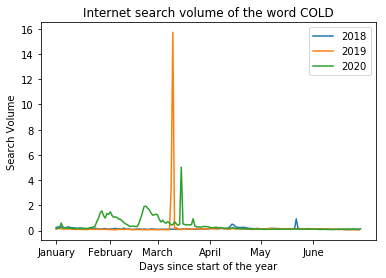

In [106]:
# NEGLICTING THE MOMENTARY OUTLIER, THE SEARCH VOLUME OF 'COLD' WAS HIGHER IN 2020 SIGNIFICANTLY
plt.plot(search_2018_cold)
plt.plot(search_2019_cold)
plt.plot(search_2020_cold)

plt.title('Internet search volume of the word COLD')
plt.xlabel('Days since start of the year')
plt.ylabel('Search Volume')
plt.xticks(ticks=[0,32,60,91,121,152], labels=['January','February','March','April','May','June'])
plt.legend(labels=['2018','2019','2020'])

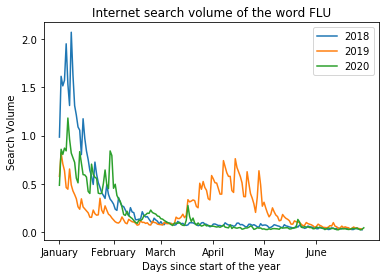

In [107]:
# SEARCH VOLUME OF 'FLU' WAS USUAL, NO SIGNIFICANT CHANGE
plt.plot(search_2018_flu)
plt.plot(search_2019_flu)
plt.plot(search_2020_flu)

plt.title('Internet search volume of the word FLU')
plt.xlabel('Days since start of the year')
plt.ylabel('Search Volume')
plt.xticks(ticks=[0,32,60,91,121,152], labels=['January','February','March','April','May','June'])
plt.legend(labels=['2018','2019','2020'])

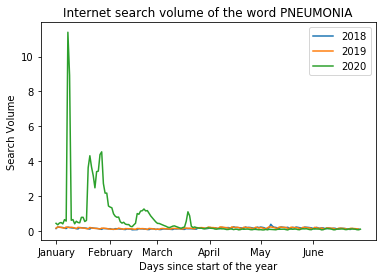

In [108]:
# 'PNEUMONIA' WAS SEARCHED IN MUCH HIGHER VOLUME, ATLEAST 100x HIGHER
plt.plot(search_2018_pneumonia)
plt.plot(search_2019_pneumonia)
plt.plot(search_2020_pneumonia)

plt.title('Internet search volume of the word PNEUMONIA')
plt.xlabel('Days since start of the year')
plt.ylabel('Search Volume')
plt.xticks(ticks=[0,32,60,91,121,152], labels=['January','February','March','April','May','June'])
plt.legend(labels=['2018','2019','2020'])

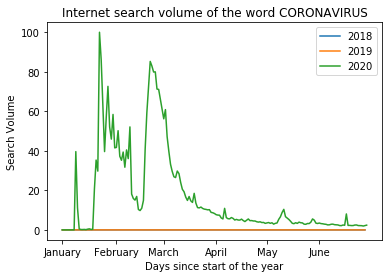

In [109]:
# 'CORONAVIRUS' SEARCHES WERE 1000x HIGHER IN VOLUME
plt.plot(search_2018_corona)
plt.plot(search_2019_corona)
plt.plot(search_2020_corona)

plt.title('Internet search volume of the word CORONAVIRUS')
plt.xlabel('Days since start of the year')
plt.ylabel('Search Volume')
plt.xticks(ticks=[0,32,60,91,121,152], labels=['January','February','March','April','May','June'])
plt.legend(labels=['2018','2019','2020'])

In [120]:
dataset_case = pd.read_csv('Case.csv')

In [121]:
dataset_case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [125]:
dataset_case['group'].value_counts()

True     124
False     50
Name: group, dtype: int64

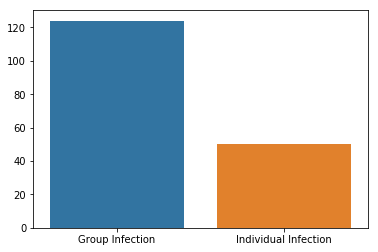

In [126]:
# Group infection rates were 2.5x higher.
sns.barplot(x=['Group Infection' , 'Individual Infection'] , y=[124,50])

In [127]:
dataset_policy = pd.read_csv('Policy.csv')

In [128]:
dataset_policy.head(10)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [131]:
# dataset_policy.info()
# dataset_policy['type'].value_counts()
dataset_policy.shape

(61, 7)

In [138]:
dataset_policy
#Key Details:
#1. Level 1(Blue) Infectious Disease Alert was announced by the govt as early as 3rd January
#2. Level 2(Yellow) Infectious Disease Alert was announced by the govt on 20th January, l3 on 28th jan
#3. The highest Red Alert was announced on 23rd February
#4. Immigration procedure was started to be heavily scrutinized starting from 4th Feb. It was limited to Chinese immigrants initially.
#5. Special immigration procedure was mandated on all countries on 19th March
#6. Drive through screening centre was first started by local govt on 26 Feb
#7. All Schools were shut on 2nd March
#8. High School online classes started on 9th April, rest of the classes from next week.

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [362]:
dataset_weather = pd.read_csv('Weather.csv')

In [363]:
dataset_weather = dataset_weather.sort_values(by='code')


In [364]:
seoul_data = dataset_weather.iloc[:1642,:]
dataset_weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
9712,10000,Seoul,2017-08-30,19.8,16.1,23.9,0.0,4.5,270.0,55.8
9728,10000,Seoul,2017-08-31,22.2,16.6,27.6,0.0,4.1,50.0,62.4
9744,10000,Seoul,2017-09-01,23.3,17.1,29.7,0.0,4.4,70.0,56.0
9760,10000,Seoul,2017-09-02,23.8,18.6,29.6,0.0,4.2,50.0,59.0


In [365]:
seoul_data.tail()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
928,10000,Seoul,2016-02-28,0.7,-2.6,6.9,4.1,5.3,90.0,65.5
560,10000,Seoul,2016-02-05,-2.2,-6.8,3.4,0.0,5.4,320.0,39.4
448,10000,Seoul,2016-01-29,1.9,-1.4,5.4,0.0,4.4,90.0,43.6
256,10000,Seoul,2016-01-17,1.7,-0.7,5.4,0.0,4.0,90.0,64.0
768,10000,Seoul,2016-02-18,3.5,-1.4,7.8,0.0,7.6,270.0,66.4


In [394]:
seoul_data = seoul_data.sort_values(by='date')

In [404]:
seoul_data_2020 = seoul_data.iloc[1461:,:]

In [407]:
seoul_data_2020.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23375,10000,Seoul,2020-01-01,-2.2,-6.5,0.3,0.0,2.6,50.0,64.4
23391,10000,Seoul,2020-01-02,1.0,-0.7,3.8,0.0,4.0,50.0,65.4
23407,10000,Seoul,2020-01-03,-0.1,-3.4,4.6,0.0,3.5,290.0,56.9
23423,10000,Seoul,2020-01-04,1.2,-2.8,6.1,0.0,4.5,50.0,50.8
23439,10000,Seoul,2020-01-05,1.3,-3.2,6.6,0.0,2.9,50.0,45.6


In [408]:
seoul_weather_2020 = seoul_data_2020.iloc[:,[3,9]].values

In [410]:
seoul_weather_2020[0:5]

array([[-2.2, 64.4],
       [ 1. , 65.4],
       [-0.1, 56.9],
       [ 1.2, 50.8],
       [ 1.3, 45.6]])

In [411]:
seoul_2020_temp = []
seoul_2020_humid = []

for i in seoul_weather_2020:
    seoul_2020_temp.append(i[0])
    seoul_2020_humid.append(i[1])
    

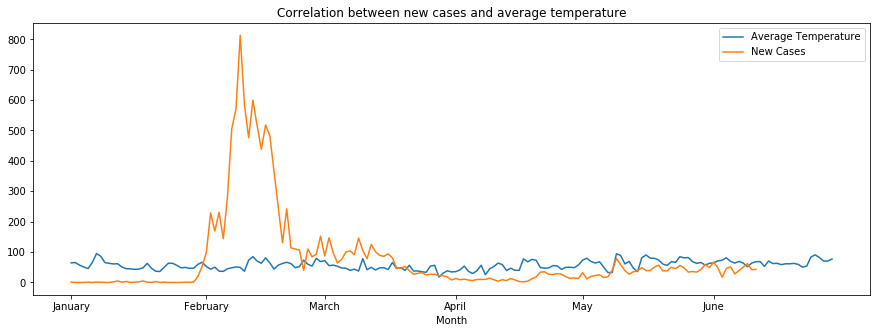

In [414]:
plt.figure(figsize=(15,5))
plt.plot(seoul_2020_humid)
plt.plot(day_by_day_confirmed)
plt.xlabel('Month')
plt.title('Correlation between new cases and average temperature')
plt.xticks(ticks=[0,32,60,91,121,152], labels=['January','February','March','April','May','June'])
plt.legend(labels=['Average Temperature','New Cases'])

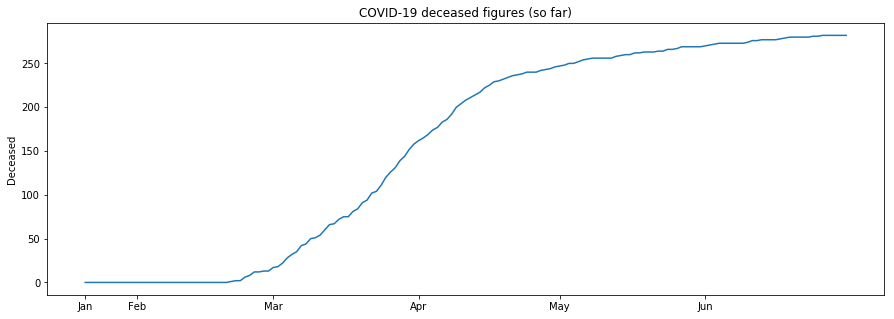

In [417]:
plt.figure(figsize=(15,5))
plt.plot(all_deceased)
plt.title('COVID-19 deceased figures (so far)')
plt.ylabel('Deceased')
plt.xticks(ticks=[0,11,40,71,101,132] ,labels = ['Jan','Feb','Mar','Apr','May','Jun'])
plt.show()

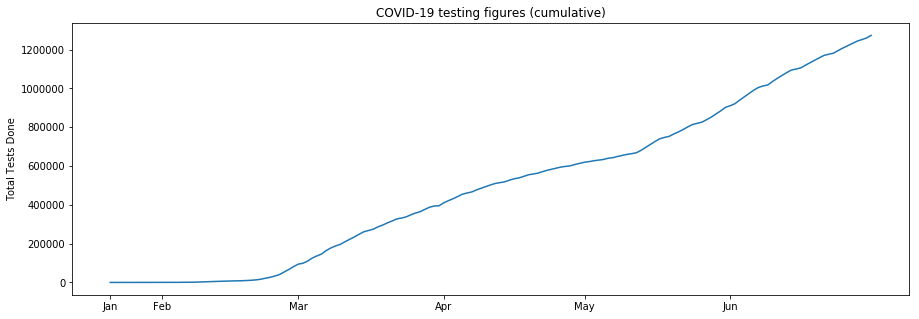

In [420]:
plt.figure(figsize=(15,5))
plt.plot(all_test)
plt.title('COVID-19 testing figures (cumulative)')
plt.ylabel('Total Tests Done')
plt.xticks(ticks=[0,11,40,71,101,132] ,labels = ['Jan','Feb','Mar','Apr','May','Jun'])
plt.show()

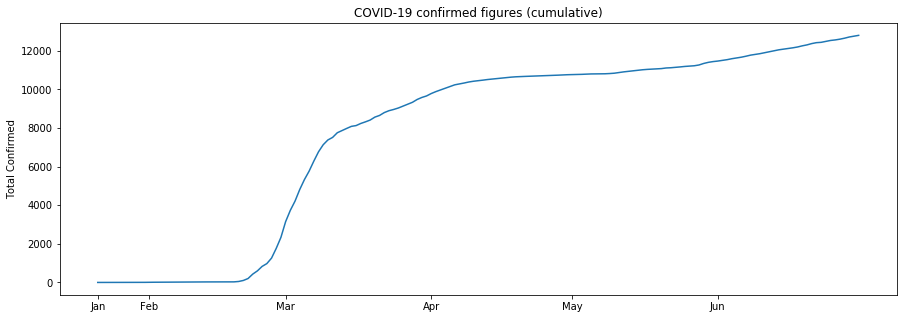

In [419]:
plt.figure(figsize=(15,5))
plt.plot(all_confirmed)
plt.title('COVID-19 confirmed figures (cumulative)')
plt.ylabel('Total Confirmed')
plt.xticks(ticks=[0,11,40,71,101,132] ,labels = ['Jan','Feb','Mar','Apr','May','Jun'])
plt.show()